# Heat equation - Cooling of intrusions
## Part 2: Finite Difference - 1D

The analytical solution for the cooling of a dyke only works if we make the asumptions that the cooling is one dimentional and there is only one source of heat. 

Here we employ a numerical technique for a similar setup to demonstrate that numerical techniques allow investigating more complex situations.

We will calculate the temperature profile across two parallel dykes. The situation is therefore still one dimentional, but the temperature evolution is more complex (the two dykes interact). 

The heat equation and the employed finite difference scheme (Forward Euler) are detailed in the hand-out.

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

### Physical parameters
Here we indicate the physical parameters of the simulation. 

In [2]:
X1 = -50                # position dyke 1
X2 = 50                 # position dyke 2

T1 = 1200               # temperature dyke 1
T2 = 1200               # temperature dyke 2
T0 = 200                # temperature host rock

W1 = 20                 # width dyke 1
W2 = 20                 # width dyke 2

t1 = 0                  # time intrusion dyke 1
t2 = 6e8                # time intrusion dyke 2
tend = 12e8             # time end of simulation

k = 1e-6                # thermal diffusivity

### Numerical parameters
Here we define the length of the domain, resolution and time step

In [3]:
L = 2000                # length of the spatial domain
dx = 1
nx = L+1
x = np.linspace(-L/2, L/2, num=nx)         # resolution of the space vector
dt = 0.4*(dx*dx / (2*k))


### Initial conditions
Defines the initial temperature profile

In [4]:
T = T0*np.ones(nx)                         # define host temperature everywhere

dX1 = x - X1                               # distances from dyke 1 center
for index, item in enumerate(dX1):         # if within dyke 1 then initial temp is T1
     if abs(item) < W1/2:
         T[index] = T1

### First time loop
We calculate the evolution of the temparture along the profile from t1 to t2, using the Forward Euler scheme.

In [10]:
nt1 = int((t2-t1) / dt)

ctime = 0
for n in range(1,nt1):
    T_new = np.zeros(nx)
    for i in range(1,nx-1):
        T_new[i] = T[i] + k*dt*(T[i-1]-2*T[i]+T[i+1])/dx**2
    T_new[0] = T[0]
    T_new[nx-1] = T[nx-1]
    T = T_new
    ctime = ctime + dt

### Change initial conditions at time t2
We take the output of the first part of the simulation and modify it to account for the second intrusion at time t2

In [6]:
dX2 = x - X2                               # distances from dyke 1 center
for index, item in enumerate(dX2):         # if within dyke 1 then initial temp is T1
     if abs(item) < W2/2:
         T[index] = T2

### Second part of simulation
We calculate evolution from time t2 to tend

In [7]:
nt2 = int((tend-t2)/dt)

In [8]:
for n in range(1,nt2):
    T_new = np.zeros(nx)
    for i in range(1,nx-1):
        T_new[i] = T[i] + k*dt*(T[i-1]-2*T[i]+T[i+1])/dx**2
    
    T_new[0] = T[0]
    T_new[nx-1] = T[nx-1]
    T = T_new
    ctime = ctime + dt

Now we can examine the temperature distribution at the end of the simulation. 

<IPython.core.display.Javascript object>


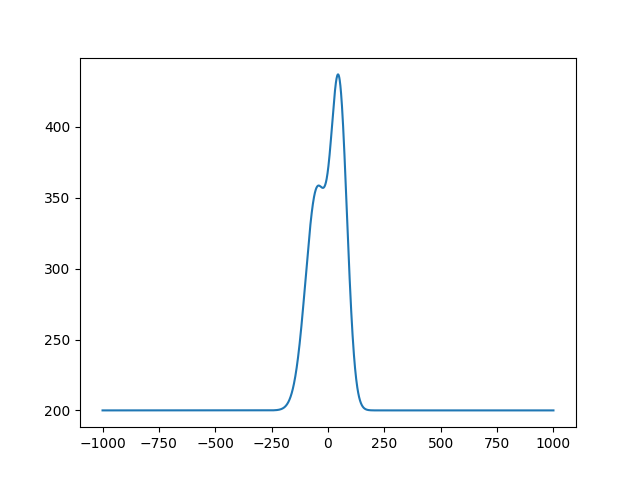

In [9]:
plt.plot(x,T)
plt.show()